In [ ]:
# Comparing American Cities Airbnb costs
## Boston vs Seattle
text text
*italics*  || **bold** || *nested**italics** here*
### what this notebook shows
1. qwe
2. asd
3. zxc
4. qaz

In [1]:
import numpy as np
import pandas as pd




%matplotlib inline
df = pd.read_csv("listings_boston.csv")
df1 = pd.read_csv("listings_seattle.csv")


In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
columns = ["property_type","price","weekly_price","monthly_price","security_deposit","cleaning_fee","guests_included","extra_people", "minimum_nights","maximum_nights"]
dfboston = df[columns]
dfseattle = df1[columns]
#[]
#dfseattle = dfseattle.loc[~(df["guests_included"] == 0)]
dfboston

,property_type,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights
0,House,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125
1,Apartment,$65.00,$400.00,NaN,$95.00,$10.00,0,$0.00,2,15
2,Apartment,$65.00,$395.00,"$1,350.00",NaN,NaN,1,$20.00,3,45
3,House,$75.00,NaN,NaN,$100.00,$50.00,2,$25.00,1,1125
4,House,$79.00,NaN,NaN,NaN,$15.00,1,$0.00,2,31
...,...,...,...,...,...,...,...,...,...,...
3580,Apartment,$69.00,NaN,NaN,$95.00,NaN,1,$24.00,2,1125
3581,Apartment,$150.00,NaN,NaN,$100.00,$15.00,1,$0.00,3,365
3582,Apartment,$198.00,NaN,NaN,NaN,NaN,1,$0.00,3,12
3583,Apartment,$65.00,NaN,NaN,$100.00,NaN,1,$30.00,1,13


In [4]:
def make_vals_numeric(df, col):
    #In:df -> out: df with numeric values to make charts with
    
    new_vals = remove_dollar_sign(df, col)
    df[col] = df[col].replace(new_vals)

In [5]:
#input the price in sting form
#returns a dict when a value of a column of numbers in a dataframe point at the 
#value in the form of string with no comma or dollar sign, any nan value becomes 0
# str: '$1,000.00' -> '1000.0'
def remove_dollar_sign(df, col):
    orig = dict()
    for x in df[col].keys():
        
        if isinstance(df[col][x],str):
            orig[df[col][x]] = remove_comma(df,col,x)
        elif isinstance(df[col][x], float):
            orig[df[col][x]] = df[col][x]
        elif df[col][x].isnull():
            orig[df[col][x]] = 0.0
    return orig

In [6]:
def grpby(df,col):
    ret = df.groupby(col)[col].count()
    return ret

In [7]:
def remove_comma(dataframe,col,position):
    res=""
    #position = row
    this_parse = dataframe[col][position][1:]
    for x in range(len(this_parse)):
        if this_parse[x] != ',':
            res += this_parse[x]
    return res

In [8]:
#can make a function
#col = 'price'
#dataframe = dfboston

def airbnb_average(dataframe,col):
    res1 = 0
    for y in dataframe[col].keys():
        res = remove_comma(dataframe,col,y)
        res1 += float(res)
    final = res1/len(dataframe[col].keys())
    return int(final)
#airbnb_average(dataframe,col)

In [9]:
#dropping all rows that don't have any availability this year
#df2 = df2.dropna(subset=['weekly_price'],how='any')

#df2
times = {"weekly_price":7, "monthly_price":30}
def average_price(dataframe, col):
    
    
    for x in dataframe[col].keys():
        if dataframe['maximum_nights'][x] >= 30:
            dataframe['monthly_price'][x] = "$" + str(float(remove_comma(dataframe,'price',x)) * 30.0)
        if dataframe['maximum_nights'][x] >= 7:
            dataframe['weekly_price'][x] = "$" + str(float(remove_comma(dataframe,'price',x)) * 7.0)
    
    return dataframe

In [10]:
def drop_col(database,col):
    new_database = database.dropna(subset=[col],how='any')
    return new_database

In [11]:
#uses the daily price if the listings doesn't have weekly or monthly prices

def city_average_price(dataframe):
    res = {"price":airbnb_average(dataframe, 'price'),"weekly_price":0, "monthly_price":0}
    
    dataframe = average_price(dataframe, 'weekly_price')
    dataframe = average_price(dataframe, 'monthly_price')
    
    dataframe_weekly = drop_col(dataframe, 'weekly_price')
    dataframe_monthly = drop_col(dataframe, 'monthly_price')
    
    dataframe_weekly_average = airbnb_average(dataframe_weekly, 'weekly_price')
    dataframe_monthly_average = airbnb_average(dataframe_monthly, 'monthly_price')
    res['weekly_price'] = dataframe_weekly_average
    res['monthly_price'] = dataframe_monthly_average
    return res

In [12]:
seattle_averages = city_average_price(dfseattle)
seattle_averages

<ipython-input-9-60ea5f992614>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['monthly_price'][x] = "$" + str(float(remove_comma(dataframe,'price',x)) * 30.0)
<ipython-input-11-fc2618aa2494>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe = average_price(dataframe, 'weekly_price')
<ipython-input-9-60ea5f992614>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['weekly_price'][x] = "$" + str(float(remov

{'price': 127, 'weekly_price': 899, 'monthly_price': 3869}

In [13]:
boston_averages = city_average_price(dfboston)
boston_averages

<ipython-input-9-60ea5f992614>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['monthly_price'][x] = "$" + str(float(remove_comma(dataframe,'price',x)) * 30.0)
<ipython-input-11-fc2618aa2494>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe = average_price(dataframe, 'weekly_price')
<ipython-input-9-60ea5f992614>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['weekly_price'][x] = "$" + str(float(remov

{'price': 173, 'weekly_price': 1220, 'monthly_price': 5255}

In [14]:
#copy the dataframe into a temp df to make charts out of
df_seattle = dfseattle.copy()

make_vals_numeric(df_seattle, "price")
df_seattle["price"] = pd.to_numeric(df_seattle['price'], errors='coerce')
make_vals_numeric(df_seattle, "weekly_price")
df_seattle["weekly_price"] = pd.to_numeric(df_seattle['weekly_price'], errors='coerce')
make_vals_numeric(df_seattle, "monthly_price")
df_seattle["monthly_price"] = pd.to_numeric(df_seattle['monthly_price'], errors='coerce')



df_seattle["monthly_price"]

0        2550.0
1        4500.0
2       29250.0
3        3000.0
4       13500.0
         ...   
3813    10770.0
3814        NaN
3815        NaN
3816     2970.0
3817     2610.0
Name: monthly_price, Length: 3818, dtype: float64

In [15]:
house_list = ['House','Apartment','Townhouse','Condominium', 'Loft']
housing = []
for x in df_seattle["property_type"].keys():
    if df_seattle["property_type"][x] in house_list:
        housing.append(df_seattle["property_type"][x])
    else:
        housing.append("Other")

df_seattle["housing"] = housing

price      
               mean count
housing                  
Condominium  151.11    91
Loft         135.70    40
House        132.35  1733
Townhouse    129.46   118
Apartment    122.93  1708
Other        115.81   128

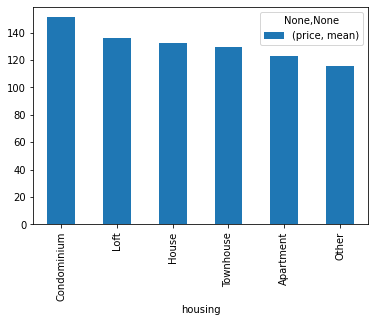

In [16]:


df_seattle[['housing','price']].groupby('housing').agg(['mean']).sort_values(by=('price','mean'), ascending=False).round(2).plot(kind = "bar")
df_seattle[['housing','price']].groupby('housing').agg(['mean','count']).sort_values(by=('price','mean'), ascending=False).round(2)

#df_seattle


In [17]:
#copy the dataframe into a temp df to make charts out of
df_boston = dfboston.copy()

make_vals_numeric(df_boston, "price")
df_boston["price"] = pd.to_numeric(df_boston['price'], errors='coerce')
make_vals_numeric(df_boston, "weekly_price")
df_boston["weekly_price"] = pd.to_numeric(df_boston['weekly_price'], errors='coerce')
make_vals_numeric(df_boston, "monthly_price")
df_boston["monthly_price"] = pd.to_numeric(df_boston['monthly_price'], errors='coerce')



df_boston

,property_type,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights
0,House,250.0,1750.0,7500.0,NaN,$35.00,1,$0.00,2,1125
1,Apartment,65.0,455.0,NaN,$95.00,$10.00,0,$0.00,2,15
2,Apartment,65.0,455.0,1950.0,NaN,NaN,1,$20.00,3,45
3,House,75.0,525.0,2250.0,$100.00,$50.00,2,$25.00,1,1125
4,House,79.0,553.0,2370.0,NaN,$15.00,1,$0.00,2,31
...,...,...,...,...,...,...,...,...,...,...
3580,Apartment,69.0,483.0,2070.0,$95.00,NaN,1,$24.00,2,1125
3581,Apartment,150.0,1050.0,4500.0,$100.00,$15.00,1,$0.00,3,365
3582,Apartment,198.0,1386.0,NaN,NaN,NaN,1,$0.00,3,12
3583,Apartment,65.0,455.0,NaN,$100.00,NaN,1,$30.00,1,13


price      
               mean count
housing                  
Condominium  190.25   231
Loft         185.41    39
Apartment    181.97  2612
Other        172.90    87
Townhouse    149.04    54
House        131.60   562

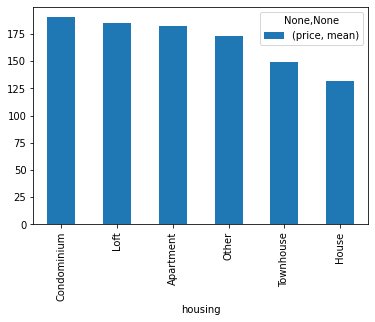

In [18]:
#create a new columnt to create charts from
house_list = ['House','Apartment','Townhouse','Condominium', 'Loft',"Other"]
housing = []
for x in df_boston["property_type"].keys():
    if df_boston["property_type"][x] in house_list:
        housing.append(df_boston["property_type"][x])
    else:
        housing.append("Other")

df_boston["housing"] = housing


df_boston[['housing','price']].groupby('housing').agg(['mean']).sort_values(by=('price','mean'), ascending=False).round(2).plot(kind = "bar")

df_boston[['housing','price']].groupby('housing').agg(['mean','count']).sort_values(by=('price','mean'), ascending=False).round(2)


In [19]:
#want to create new dfs to find out how much each owner makes
#df_seattle
#df_seattle_hosts = df[["security_deposit","cleaning_fee","extra_people","guests_included","property_type"]]

In [20]:
make_vals_numeric(df_seattle, "security_deposit")
df_seattle["security_deposit"] = pd.to_numeric(df_seattle['security_deposit'], errors='coerce')
make_vals_numeric(df_seattle, "cleaning_fee")
df_seattle["cleaning_fee"] = pd.to_numeric(df_seattle['cleaning_fee'], errors='coerce')
remove_dollar_sign(df_seattle,"security_deposit")
remove_dollar_sign(df_seattle,"cleaning_fee")

make_vals_numeric(df_seattle, "extra_people")
df_seattle["extra_people"] = pd.to_numeric(df_seattle["extra_people"], errors='coerce')
extra_people = remove_dollar_sign(df_seattle, "extra_people")

In [21]:



def cost_per_person(df, accom,days):
    mins = []
    maxs = []
    
    for x in df["property_type"].keys():
        #df: dataframe, accom: number of people splitting the bill(assumingly even), days:days spent at airbnb
        #if days is under the minimum or over the maximum it'll it limited to the min_nights or max_nights respectively
        #returns a list of lists, list of ret[0] is the list of minimums. list of ret[1] is the list of maximums
        num_of_ppl = accom
        if 0 < accom <= df["guests_included"][x]:
            num_of_ppl = accom
        elif accom > df["guests_included"][x]:
            extra = accom - df["guests_included"][x]
            num_of_ppl = df["guests_included"][x] + df["extra_people"][x] * extra
        
        if 0< df["minimum_nights"][x] <= days<= df["maximum_nights"][x]:
            staying = days
        elif 0 < days <= df["minimum_nights"][x] <= df["maximum_nights"][x] :
            staying =  df["minimum_nights"][x] 
        elif 0 < df["maximum_nights"][x] <= days:
            staying = df["maximum_nights"][x]
        minimum = (df["cleaning_fee"][x] + df["security_deposit"][x] + df["price"][x] * df["minimum_nights"][x])/ num_of_ppl 
        maximum = (df["cleaning_fee"][x] + df["security_deposit"][x] + df["price"][x] * staying)/ num_of_ppl
        if df["guests_included"][x] == 0:
            minimum,maximum = (0,0)
        # round if we get floats/ we only get ints if the row has guests_included = 0
        if (isinstance(minimum, float) or isinstance(maximum, float)):
            mins.append(minimum.round(2))
            maxs.append(maximum.round(2))
        else:
            mins.append(minimum)
            maxs.append(maximum)
    
    return [mins, maxs]
    


In [22]:
values = cost_per_person(df_seattle,3, 19)

df_seattle["minimum"] = values[0]
df_seattle["maximum"] = values[1]

<ipython-input-21-b4cd5c6229de>:22: RuntimeWarning: divide by zero encountered in double_scalars
  minimum = (df["cleaning_fee"][x] + df["security_deposit"][x] + df["price"][x] * df["minimum_nights"][x])/ num_of_ppl
<ipython-input-21-b4cd5c6229de>:23: RuntimeWarning: divide by zero encountered in double_scalars
  maximum = (df["cleaning_fee"][x] + df["security_deposit"][x] + df["price"][x] * staying)/ num_of_ppl


<AxesSubplot:title={'center':'Average price of splitting an airbnb (maximum nights)'}, xlabel='housing', ylabel='Price'>

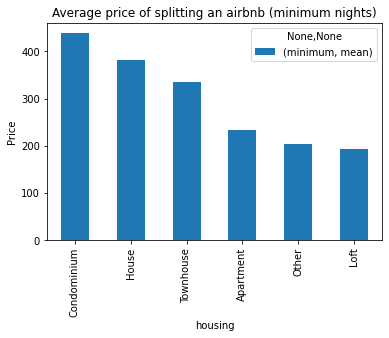

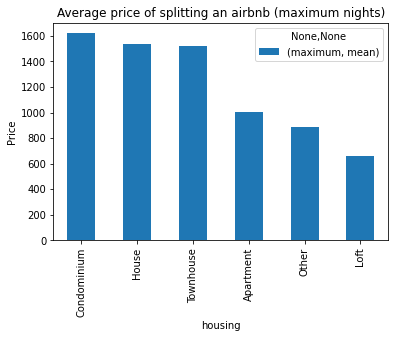

In [23]:
df_seattle[["housing", "minimum"]].groupby('housing').agg(['mean']).sort_values(by=('minimum','mean'), ascending =False).round(2).plot(title='Average price of splitting an airbnb (minimum nights)',ylabel='Price',kind="bar")

df_seattle[["housing", "maximum"]].groupby('housing').agg(['mean']).sort_values(by=('maximum','mean'), ascending =False).round(2).plot(title='Average price of splitting an airbnb (maximum nights)',ylabel='Price',kind="bar")

In [24]:
make_vals_numeric(df_boston, "security_deposit")
df_boston["security_deposit"] = pd.to_numeric(df_boston['security_deposit'], errors='coerce')
make_vals_numeric(df_boston, "cleaning_fee")
df_boston["cleaning_fee"] = pd.to_numeric(df_boston['cleaning_fee'], errors='coerce')
remove_dollar_sign(df_boston,"security_deposit")
remove_dollar_sign(df_boston,"cleaning_fee")

make_vals_numeric(df_boston, "extra_people")
df_boston["extra_people"] = pd.to_numeric(df_boston["extra_people"], errors='coerce')
extra_people = remove_dollar_sign(df_boston, "extra_people")

In [25]:
values = cost_per_person(df_boston,1, 30)

df_boston["minimum"] = values[0]
df_boston["maximum"] = values[1]

<ipython-input-21-b4cd5c6229de>:22: RuntimeWarning: divide by zero encountered in double_scalars
  minimum = (df["cleaning_fee"][x] + df["security_deposit"][x] + df["price"][x] * df["minimum_nights"][x])/ num_of_ppl
<ipython-input-21-b4cd5c6229de>:23: RuntimeWarning: divide by zero encountered in double_scalars
  maximum = (df["cleaning_fee"][x] + df["security_deposit"][x] + df["price"][x] * staying)/ num_of_ppl


<AxesSubplot:title={'center':'Average price of splitting an airbnb (maximum nights)'}, xlabel='housing', ylabel='Price'>

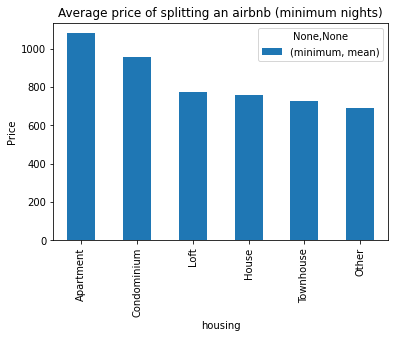

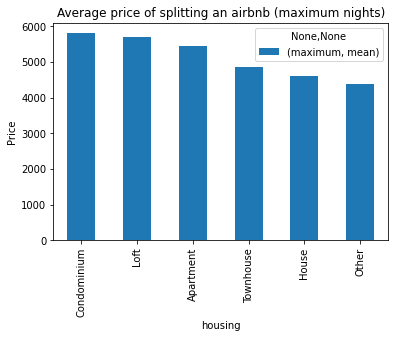

In [26]:
df_boston[["housing", "minimum"]].groupby('housing').agg(['mean']).sort_values(by=('minimum','mean'), ascending =False).round(2).plot(title='Average price of splitting an airbnb (minimum nights)',ylabel='Price',legend = {"ok"},kind="bar")

df_boston[["housing", "maximum"]].groupby('housing').agg(['mean']).sort_values(by=('maximum','mean'), ascending =False).round(2).plot(title='Average price of splitting an airbnb (maximum nights)',ylabel='Price',kind="bar")

In [27]:
#do analysis on the review scores
reviews_columns = ['id','price','host_is_superhost','number_of_reviews', 'first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin','review_scores_communication', 'review_scores_location', 'review_scores_value',  'cancellation_policy',  'reviews_per_month']
#df[(df != 0).all(1)]     

df_seattle_reviews = df1[reviews_columns]


make_vals_numeric(df_seattle_reviews, "price")
df_seattle_reviews["price"] = pd.to_numeric(df_seattle_reviews['price'], errors='coerce')
# remove all the rows with values of 0. this only affects number_of_reviews df.dropna(how='all')
df_seattle_reviews = df_seattle_reviews[(df_seattle_reviews != 0).all(1) ]
# remove columns that contain no review scores at all
df_seattle_reviews = df_seattle_reviews.dropna(subset =[ 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin','review_scores_communication', 'review_scores_location', 'review_scores_value',] )
#df_seattle_reviews.sort_values(by=["number_of_reviews"], axis=0, ascending=False)
#df_seattle_reviews

<ipython-input-4-530f17f01b68>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].replace(new_vals)
<ipython-input-27-c8747558adbf>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seattle_reviews["price"] = pd.to_numeric(df_seattle_reviews['price'], errors='coerce')


<AxesSubplot:xlabel='review_scores_value', ylabel='price'>

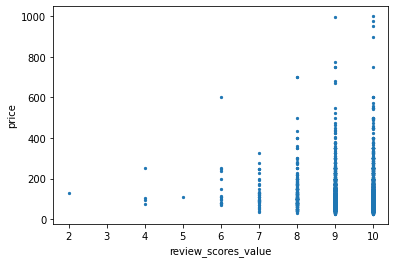

In [28]:
df_seattle_reviews.plot.scatter(x='review_scores_value', y='price', s=5)
#df_seattle_reviews.plot.scatter[["housing", "minimum"]].groupby('housing').agg(['mean']).sort_values(by=('minimum','mean'), ascending =False)(x='review_scores_value', y='price', s=5)


In [29]:
df_boston_reviews = df[reviews_columns]
#
make_vals_numeric(df_boston_reviews, "price")
df_boston_reviews["price"] = pd.to_numeric(df_boston_reviews['price'], errors = 'coerce')

df_boston_reviews = df_boston_reviews[(df_boston_reviews != 0).all(1) ]

df_boston_reviews = df_boston_reviews.dropna(subset =[ 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin','review_scores_communication', 'review_scores_location', 'review_scores_value',] )


<ipython-input-4-530f17f01b68>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].replace(new_vals)
<ipython-input-29-ed7e5765ef0b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_boston_reviews["price"] = pd.to_numeric(df_boston_reviews['price'], errors = 'coerce')


<AxesSubplot:xlabel='review_scores_value', ylabel='price'>

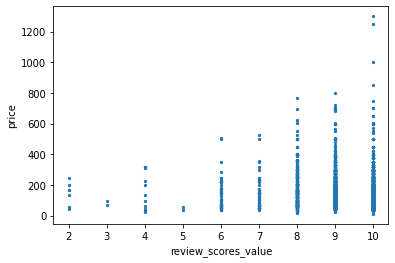

In [30]:
df_boston_reviews.plot.scatter(x='review_scores_value', y='price', s=5)


<AxesSubplot:>

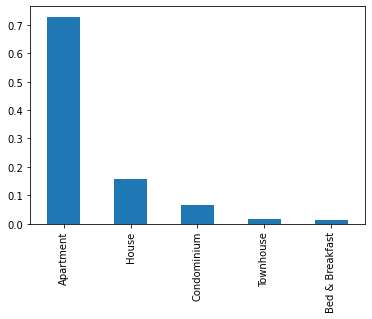

In [31]:
status = df_boston.property_type.value_counts()
(status[:5]/df_boston.shape[0]).plot(kind="bar")

In [32]:
#input the price in sting form
#returns a dict when a value of a column of numbers in a dataframe point at the 
#value in the form of string with no comma or dollar sign, any nan value becomes 0
# str: '$1,000.00' -> '1000.0'
#def remove_dollar_sign(df, col):
   # orig = dict()
   # for x in df[col].keys():
        
    #    if isinstance(df[col][x],str):
    #        orig[df[col][x]] = remove_comma(df,col,x)
    #    else:
   #         orig[df[col][x]] = 0.0
    #return orig


In [33]:

seattle_averages = city_average_price(dfseattle)
seattle_averages

<ipython-input-9-60ea5f992614>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['monthly_price'][x] = "$" + str(float(remove_comma(dataframe,'price',x)) * 30.0)
<ipython-input-11-fc2618aa2494>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe = average_price(dataframe, 'weekly_price')
<ipython-input-9-60ea5f992614>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['weekly_price'][x] = "$" + str(float(remov

{'price': 127, 'weekly_price': 899, 'monthly_price': 3869}

In [34]:
dfseattle

,property_type,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights
0,Apartment,$85.00,$595.0,$2550.0,NaN,NaN,2,$5.00,1,365
1,Apartment,$150.00,$1050.0,$4500.0,$100.00,$40.00,1,$0.00,2,90
2,House,$975.00,$6825.0,$29250.0,"$1,000.00",$300.00,10,$25.00,4,30
3,Apartment,$100.00,$700.0,$3000.0,NaN,NaN,1,$0.00,1,1125
4,House,$450.00,$3150.0,$13500.0,$700.00,$125.00,6,$15.00,1,1125
...,...,...,...,...,...,...,...,...,...,...
3813,House,$359.00,$2513.0,$10770.0,NaN,$230.00,1,$0.00,3,1125
3814,Apartment,$79.00,$553.0,NaN,$500.00,$50.00,3,$25.00,2,29
3815,House,$93.00,$651.0,NaN,$250.00,$35.00,2,$20.00,1,7
3816,Condominium,$99.00,$693.0,$2970.0,$300.00,$45.00,1,$0.00,3,1125


In [35]:
boston_averages = city_average_price(dfboston)
boston_averages


<ipython-input-9-60ea5f992614>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['monthly_price'][x] = "$" + str(float(remove_comma(dataframe,'price',x)) * 30.0)
<ipython-input-11-fc2618aa2494>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe = average_price(dataframe, 'weekly_price')
<ipython-input-9-60ea5f992614>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['weekly_price'][x] = "$" + str(float(remov

{'price': 173, 'weekly_price': 1220, 'monthly_price': 5255}

In [36]:
same = airbnb_average(dfseattle, 'price')
same

127

In [37]:
dfboston_weekly_average

NameError: name 'dfboston_weekly_average' is not defined

In [ ]:
same = airbnb_average(dfboston, 'price')
same

In [ ]:

no_nulls = set(df.columns[df.isnull().mean()==0])
print(len(no_nulls))

In [ ]:
most_missing_cols = set(df.columns[df.isnull().mean() >0.75])
most_missing_cols

In [ ]:
col_names = []
df_boston_reviews = df.drop